In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from keras.datasets import imdb
(train_X, train_y), (test_X, test_Y) = imdb.load_data(num_words = 10000)
print(train_X[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#Each review (row) is of different size. This data needs to be made uniform. 
# i.e. each reviuew (i.e. row) needs to be onehotencoded to a length of 10,000 (we have decided to have only 10000 features)

def OneHotEncoding_fn(IMDBData, dimension=10000):
    #25k x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(IMDBData), dimension)) 
    for i, sequence in enumerate(IMDBData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data
print(train_X[0])

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_Y).astype('float32')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
#create the layers
#import keras as keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

C:\Users\91966\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
40/40 [==============================] - 3s 53ms/step - loss: 0.4568 - binary_accuracy: 0.7974 - val_loss: 0.3557 - val_binary_accuracy: 0.8526
Epoch 2/25
40/40 [==============================] - 0s 12ms/step - loss: 0.2523 - binary_accuracy: 0.9100 - val_loss: 0.3194 - val_binary_accuracy: 0.8722
Epoch 3/25
40/40 [==============================] - 0s 12ms/step - loss: 0.1906 - binary_accuracy: 0.9306 - val_loss: 0.2739 - val_binary_accuracy: 0.8930
Epoch 4/25
40/40 [==============================] - 0s 12ms/step - loss: 0.1552 - binary_accuracy: 0.9451 - val_loss: 0.3039 - val_binary_accuracy: 0.8846
Epoch 5/25
40/40 [==============================] - 1s 13ms/step - loss: 0.1294 - binary_accuracy: 0.9542 - val_loss: 0.3092 - val_binary_accuracy: 0.8872
Epoch 6/25
40/40 [==============================] - 0s 12ms/step - loss: 0.1098 - binary_accuracy: 0.9617 - val_loss: 0.3253 - val_binary_accuracy: 0.8852
Epoch 7/25
40/40 [==============================] - 1s 13ms/step - los

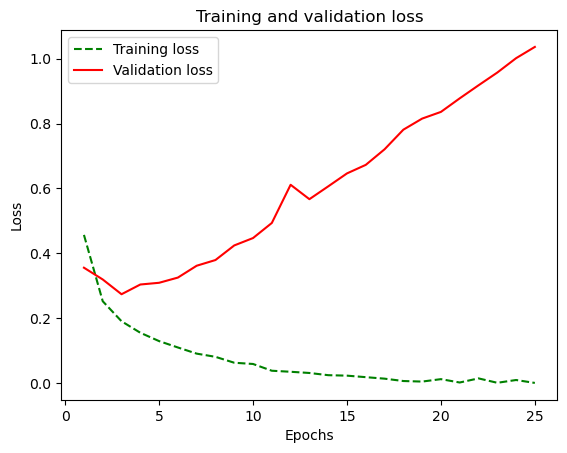

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

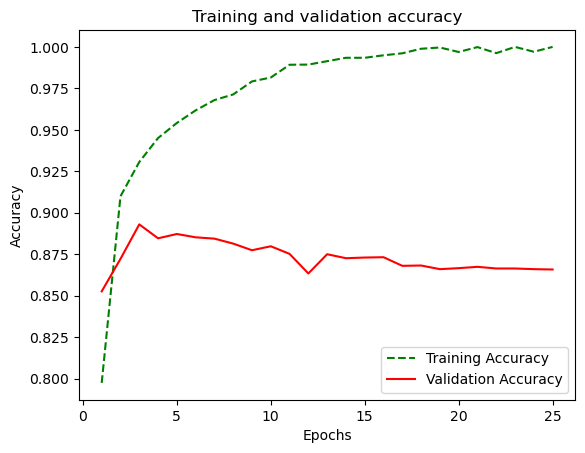

In [8]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 2

In [9]:
#create the layers
#import keras as keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 3s 54ms/step - loss: 0.4546 - binary_accuracy: 0.8094 - val_loss: 0.3182 - val_binary_accuracy: 0.8810
Epoch 2/25
40/40 [==============================] - 1s 14ms/step - loss: 0.2506 - binary_accuracy: 0.9111 - val_loss: 0.2758 - val_binary_accuracy: 0.8906
Epoch 3/25
40/40 [==============================] - 1s 14ms/step - loss: 0.1929 - binary_accuracy: 0.9301 - val_loss: 0.2755 - val_binary_accuracy: 0.8904
Epoch 4/25
40/40 [==============================] - 1s 14ms/step - loss: 0.1569 - binary_accuracy: 0.9435 - val_loss: 0.2923 - val_binary_accuracy: 0.8878
Epoch 5/25
40/40 [==============================] - 0s 12ms/step - loss: 0.1241 - binary_accuracy: 0.9577 - val_loss: 0.3146 - val_binary_accuracy: 0.8850
Epoch 6/25
40/40 [==============================] - 1s 13ms/step - loss: 0.1052 - binary_accuracy: 0.9631 - val_loss: 0.4260 - val_binary_accuracy: 0.8632
Epoch 7/25
40/40 [==============================] - 0s 12ms/step - los

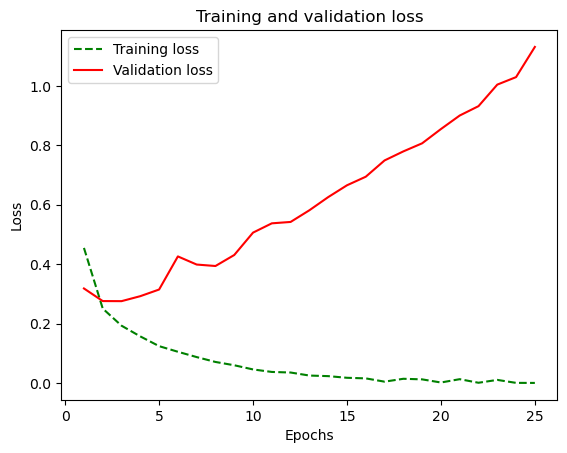

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

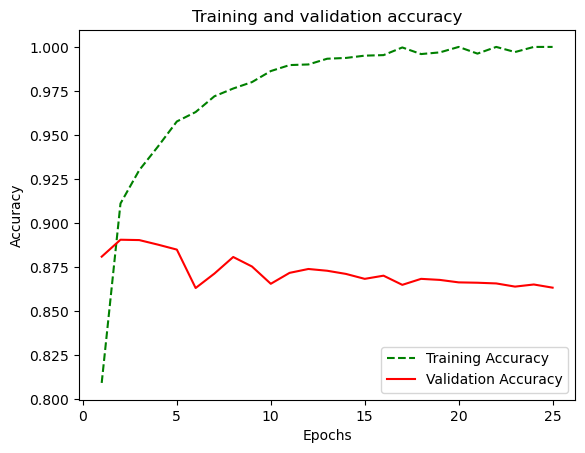

In [12]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 3: L1 Regularization

In [13]:
#create the layers
#import keras as keras
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 6s 115ms/step - loss: 1.6970 - binary_accuracy: 0.7288 - val_loss: 1.1125 - val_binary_accuracy: 0.7374
Epoch 2/25
40/40 [==============================] - 1s 14ms/step - loss: 0.9931 - binary_accuracy: 0.8226 - val_loss: 0.9386 - val_binary_accuracy: 0.8464
Epoch 3/25
40/40 [==============================] - 1s 14ms/step - loss: 0.8821 - binary_accuracy: 0.8404 - val_loss: 0.8577 - val_binary_accuracy: 0.8332
Epoch 4/25
40/40 [==============================] - 1s 13ms/step - loss: 0.8080 - binary_accuracy: 0.8465 - val_loss: 0.7952 - val_binary_accuracy: 0.8484
Epoch 5/25
40/40 [==============================] - 1s 14ms/step - loss: 0.7581 - binary_accuracy: 0.8498 - val_loss: 0.7489 - val_binary_accuracy: 0.8452
Epoch 6/25
40/40 [==============================] - 1s 14ms/step - loss: 0.7202 - binary_accuracy: 0.8543 - val_loss: 0.7145 - val_binary_accuracy: 0.8538
Epoch 7/25
40/40 [==============================] - 1s 13ms/step - lo

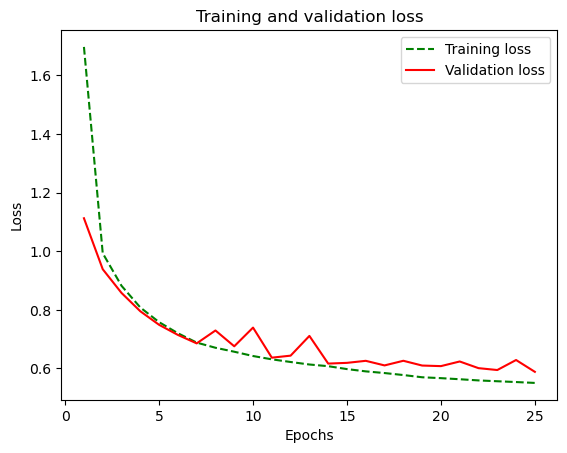

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

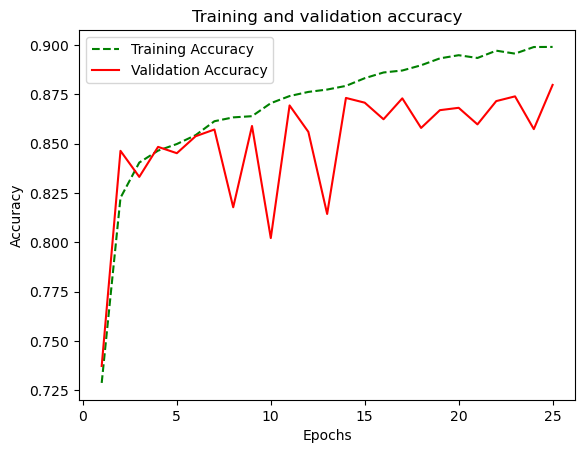

In [16]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 4

In [17]:
#create the layers
#import keras as keras
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dropout(0.5, input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 4s 75ms/step - loss: 0.5656 - binary_accuracy: 0.7062 - val_loss: 0.3754 - val_binary_accuracy: 0.8660
Epoch 2/25
40/40 [==============================] - 2s 40ms/step - loss: 0.4216 - binary_accuracy: 0.8171 - val_loss: 0.3054 - val_binary_accuracy: 0.8814
Epoch 3/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3697 - binary_accuracy: 0.8421 - val_loss: 0.2851 - val_binary_accuracy: 0.8860
Epoch 4/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3468 - binary_accuracy: 0.8538 - val_loss: 0.2757 - val_binary_accuracy: 0.8892
Epoch 5/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3194 - binary_accuracy: 0.8637 - val_loss: 0.2691 - val_binary_accuracy: 0.8910
Epoch 6/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3144 - binary_accuracy: 0.8688 - val_loss: 0.2684 - val_binary_accuracy: 0.8934
Epoch 7/25
40/40 [==============================] - 2s 40ms/step - los

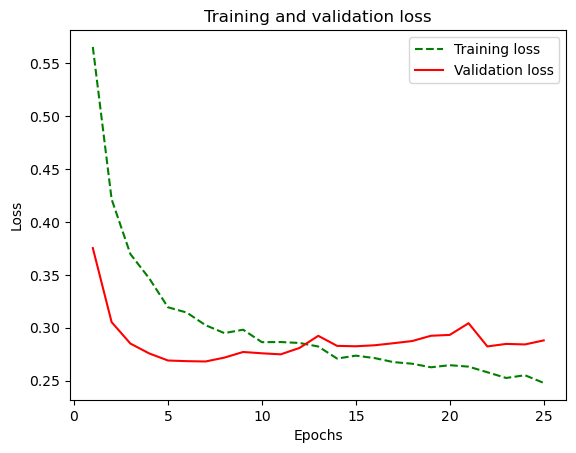

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

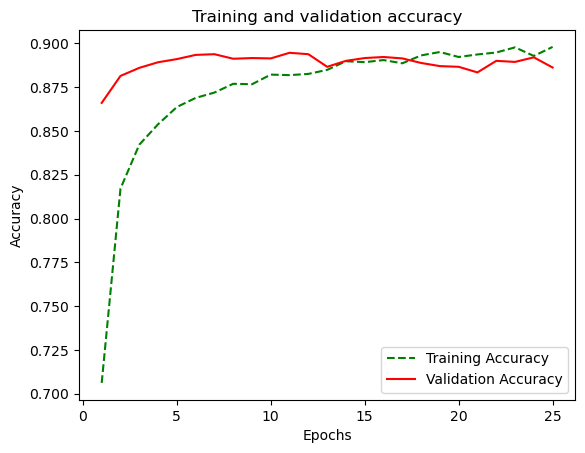

In [20]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 5

In [21]:
#create the layers
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dropout(0.55, input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.55))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


#model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),  #Momentum
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True),   #Nesterov
#model.compile(optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),              #Adagrad
model.compile(optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), #Adam
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

C:\Users\91966\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
40/40 [==============================] - 3s 63ms/step - loss: 0.6262 - binary_accuracy: 0.6486 - val_loss: 0.4394 - val_binary_accuracy: 0.8448
Epoch 2/25
40/40 [==============================] - 2s 54ms/step - loss: 0.4535 - binary_accuracy: 0.7986 - val_loss: 0.3272 - val_binary_accuracy: 0.8778
Epoch 3/25
40/40 [==============================] - 2s 39ms/step - loss: 0.3914 - binary_accuracy: 0.8314 - val_loss: 0.2966 - val_binary_accuracy: 0.8894
Epoch 4/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3605 - binary_accuracy: 0.8461 - val_loss: 0.2806 - val_binary_accuracy: 0.8892
Epoch 5/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3480 - binary_accuracy: 0.8512 - val_loss: 0.2837 - val_binary_accuracy: 0.8868
Epoch 6/25
40/40 [==============================] - 2s 40ms/step - loss: 0.3339 - binary_accuracy: 0.8566 - val_loss: 0.2765 - val_binary_accuracy: 0.8924
Epoch 7/25
40/40 [==============================] - 2s 40ms/step - los

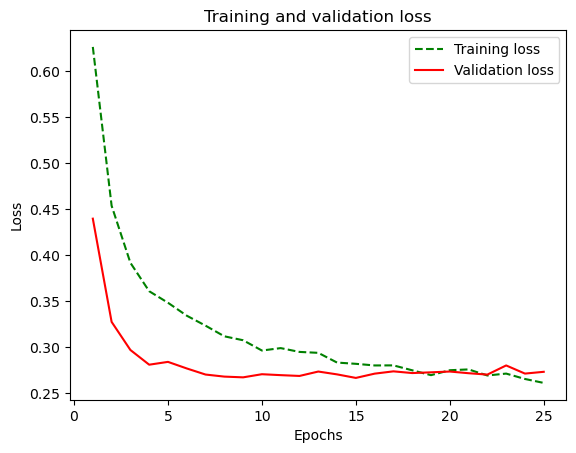

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

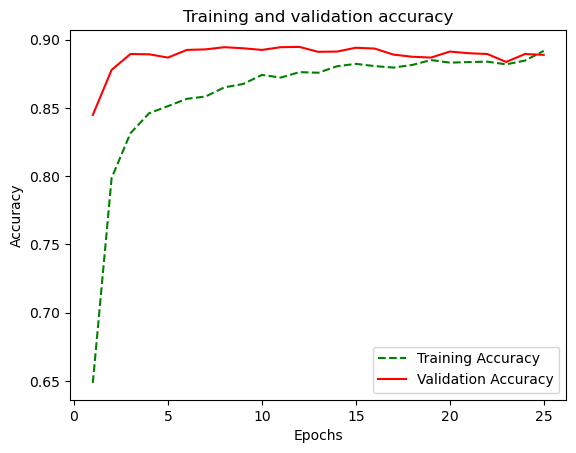

In [24]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 6

In [25]:
#create the layers
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Activation

model = models.Sequential()
#Layer 1
model.add(layers.Dropout(0.55, input_shape=(10000,)))
model.add(layers.Dense(32))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#Layer 2
model.add(layers.Dropout(0.55))
model.add(layers.Dense(32))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='tanh'))

In [26]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


#model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),  #Momentum
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True),   #Nesterov
#model.compile(optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),              #Adagrad
model.compile(optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), #Adam
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 4s 82ms/step - loss: 0.9631 - binary_accuracy: 0.5760 - val_loss: 0.5267 - val_binary_accuracy: 0.7528
Epoch 2/25
40/40 [==============================] - 2s 40ms/step - loss: 0.5253 - binary_accuracy: 0.7378 - val_loss: 0.3866 - val_binary_accuracy: 0.8628
Epoch 3/25
40/40 [==============================] - 2s 40ms/step - loss: 0.4394 - binary_accuracy: 0.7969 - val_loss: 0.3343 - val_binary_accuracy: 0.8780
Epoch 4/25
40/40 [==============================] - 2s 40ms/step - loss: 0.4124 - binary_accuracy: 0.8207 - val_loss: 0.3173 - val_binary_accuracy: 0.8854
Epoch 5/25
40/40 [==============================] - 2s 41ms/step - loss: 0.3846 - binary_accuracy: 0.8349 - val_loss: 0.3150 - val_binary_accuracy: 0.8828
Epoch 6/25
40/40 [==============================] - 2s 39ms/step - loss: 0.3711 - binary_accuracy: 0.8472 - val_loss: 0.2978 - val_binary_accuracy: 0.8912
Epoch 7/25
40/40 [==============================] - 2s 40ms/step - los

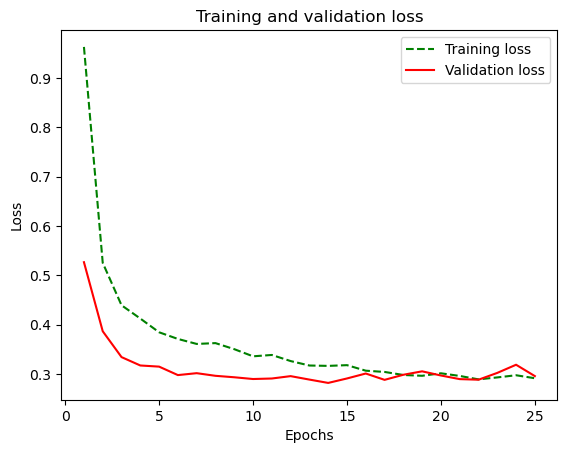

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

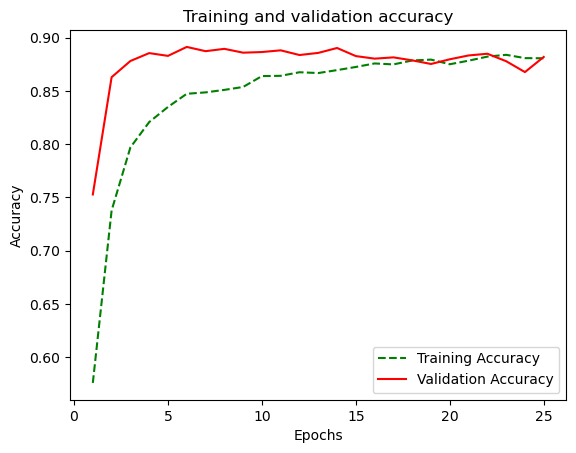

In [28]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## File 7

In [29]:
#create the layers
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Activation

model = models.Sequential()
#Layer 1
model.add(layers.Dropout(0.55, input_shape=(10000,)))
model.add(layers.Dense(32, kernel_initializer='he_uniform'))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#Layer 2
model.add(layers.Dropout(0.55))
model.add(layers.Dense(32, kernel_initializer='he_uniform'))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='tanh'))

In [30]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


#model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),  #Momentum
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True),   #Nesterov
#model.compile(optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),              #Adagrad
model.compile(optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), #Adam
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 6s 53ms/step - loss: 0.8359 - binary_accuracy: 0.6046 - val_loss: 0.4936 - val_binary_accuracy: 0.7712
Epoch 2/25
40/40 [==============================] - 2s 42ms/step - loss: 0.5000 - binary_accuracy: 0.7581 - val_loss: 0.3732 - val_binary_accuracy: 0.8530
Epoch 3/25
40/40 [==============================] - 2s 41ms/step - loss: 0.4354 - binary_accuracy: 0.8073 - val_loss: 0.3441 - val_binary_accuracy: 0.8682
Epoch 4/25
40/40 [==============================] - 2s 40ms/step - loss: 0.4069 - binary_accuracy: 0.8266 - val_loss: 0.3280 - val_binary_accuracy: 0.8678
Epoch 5/25
40/40 [==============================] - 2s 39ms/step - loss: 0.3857 - binary_accuracy: 0.8342 - val_loss: 0.3119 - val_binary_accuracy: 0.8782
Epoch 6/25
40/40 [==============================] - 2s 39ms/step - loss: 0.3776 - binary_accuracy: 0.8431 - val_loss: 0.3246 - val_binary_accuracy: 0.8704
Epoch 7/25
40/40 [==============================] - 2s 40ms/step - los

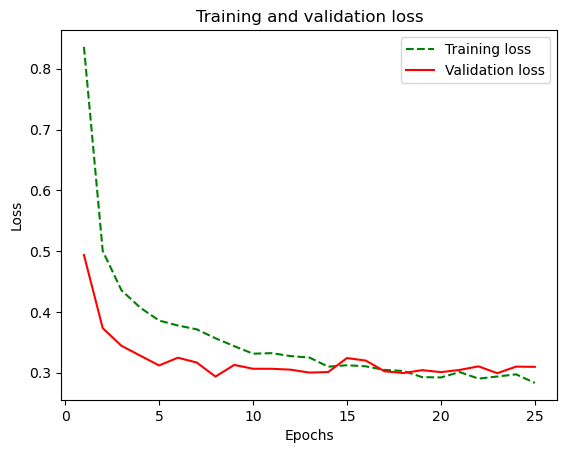

In [31]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

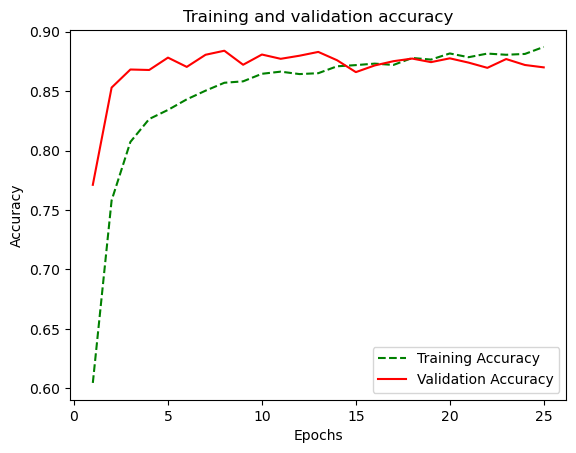

In [32]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# File 8

In [33]:
#create the layers
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Activation

model = models.Sequential()
#Layer 1
model.add(layers.Dropout(0.55, input_shape=(10000,)))
model.add(layers.Dense(32, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.00001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#Layer 2
model.add(layers.Dropout(0.55))
model.add(layers.Dense(32, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.00001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(layers.ReLU())
#model.add(layers.LeakyReLU(alpha=0.3))
#model.add(layers.ELU(alpha=1.0))

#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='tanh'))

In [34]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


#model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),  #Momentum
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True),   #Nesterov
#model.compile(optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),              #Adagrad
model.compile(optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), #Adam
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
40/40 [==============================] - 4s 58ms/step - loss: 1.8308 - binary_accuracy: 0.5548 - val_loss: 6.6550 - val_binary_accuracy: 0.4908
Epoch 2/25
40/40 [==============================] - 2s 49ms/step - loss: 1.2039 - binary_accuracy: 0.6110 - val_loss: 4.2240 - val_binary_accuracy: 0.5294
Epoch 3/25
40/40 [==============================] - 2s 40ms/step - loss: 0.9627 - binary_accuracy: 0.6652 - val_loss: 2.8254 - val_binary_accuracy: 0.6290
Epoch 4/25
40/40 [==============================] - 2s 41ms/step - loss: 0.8343 - binary_accuracy: 0.6941 - val_loss: 2.4782 - val_binary_accuracy: 0.6182
Epoch 5/25
40/40 [==============================] - 2s 41ms/step - loss: 0.7510 - binary_accuracy: 0.7187 - val_loss: 2.0219 - val_binary_accuracy: 0.6328
Epoch 6/25
40/40 [==============================] - 2s 41ms/step - loss: 0.7051 - binary_accuracy: 0.7197 - val_loss: 1.3567 - val_binary_accuracy: 0.6960
Epoch 7/25
40/40 [==============================] - 2s 41ms/step - los

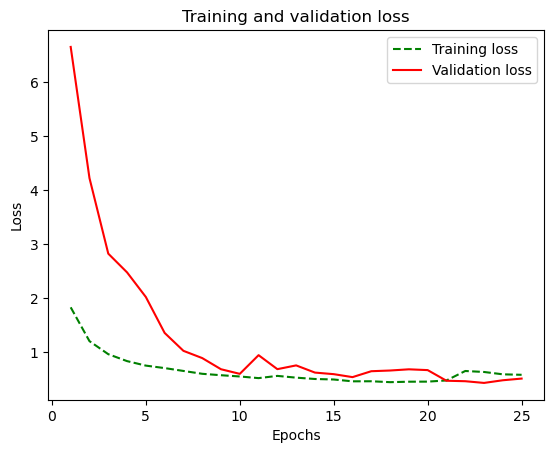

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

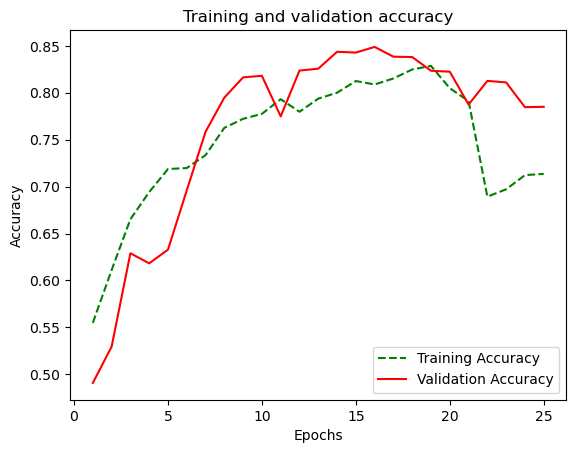

In [36]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()